In [70]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle


folder = '../../FinalResults'

csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        filename = file.split("_")
        # print(filename[0][-2:].isdigit())
        if filename[0][-2:].isdigit(): df['exp'] = filename[0][-2:]
        else: df['exp'] = filename[0][-1]
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

Total number of Nans: 0


In [53]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [54]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [55]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [56]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [57]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,entropy_loss,budget_loss,list_index,test_time,surprisal_loss
count,1928.000000,1928.0,1928.00000,1928.0,1.928000e+03,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,1928.000000,968.000000,9.680000e+02
mean,49.276971,64.0,0.00001,32.0,2.500000e-04,0.050207,4.314834,0.810411,223.877517,0.830043,232.940126,0.806351,218.764340,0.371187,0.002329,9.127075,265.082427,3.265146e-03
std,30.374125,0.0,0.00000,0.0,1.084483e-19,0.050013,2.876447,0.071036,60.999247,0.083293,111.720834,0.070771,60.223974,0.101901,0.001117,5.745234,37.457993,2.042111e-02
min,0.000000,64.0,0.00001,32.0,2.500000e-04,0.000000,0.000000,0.487480,7.765224,0.486245,7.737981,0.489450,7.761285,0.241019,0.000077,0.000000,183.094056,9.910789e-08
25%,24.000000,64.0,0.00001,32.0,2.500000e-04,0.000000,2.000000,0.809595,195.572170,0.826155,196.871300,0.805672,191.324699,0.306981,0.001969,4.000000,250.829765,6.870996e-05
50%,48.000000,64.0,0.00001,32.0,2.500000e-04,0.100000,4.000000,0.835587,236.751198,0.855502,232.421036,0.831831,231.357140,0.338705,0.002324,9.000000,281.198245,1.515942e-04
75%,72.000000,64.0,0.00001,32.0,2.500000e-04,0.100000,7.000000,0.846354,258.710724,0.873331,259.188263,0.842147,252.426167,0.392793,0.002592,14.000000,291.086404,3.557171e-04
max,124.000000,64.0,0.00001,32.0,2.500000e-04,0.100000,9.000000,0.858373,1057.760254,0.906851,1717.352417,0.854567,1074.052002,0.698154,0.017174,19.000000,312.481397,2.285060e-01


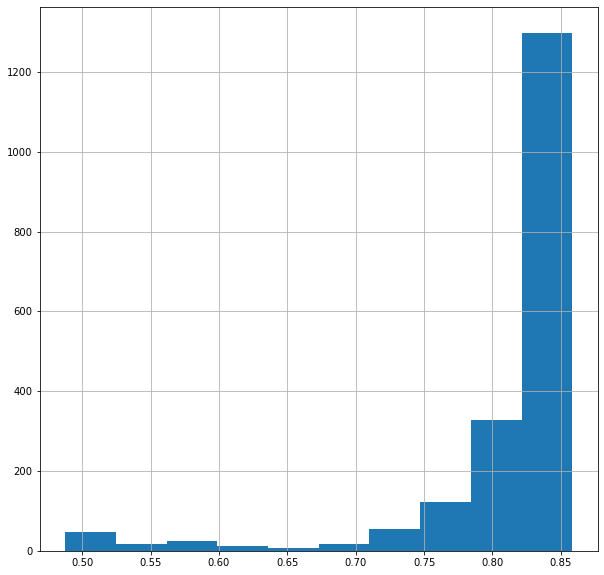

In [58]:
big_df['val_acc'].hist(figsize=(10, 10))

In [59]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'test_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'test_acc'].argmax()].to_dict())

In [60]:
best_df = pd.DataFrame(best_rows)
best_df = best_df.drop(columns= ["learning_rate", "hidden_units", "batch_size", "early_stopping"])

original = best_df[best_df['surprisal_cost'] == 0]
surprisal = best_df[best_df['surprisal_cost'] != 0]

In [61]:
print("No surprisal")
original

No surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,entropy_loss,budget_loss,list_index,exp,test_time,surprisal_loss
0,101,0.00001,0.0,0,0.851362,189.166367,0.878940,187.348297,0.849426,184.302612,0.291569,0.001873,0,0,NaN,NaN
1,69,0.00001,0.0,4,0.853666,222.241089,0.877671,213.661987,0.853432,216.965149,0.301061,0.002137,1,0,NaN,NaN
2,96,0.00001,0.0,8,0.853265,215.021637,0.889156,206.730164,0.852097,209.570511,0.277303,0.002067,2,0,NaN,NaN
6,100,0.00001,0.0,1,0.853365,243.789871,0.878272,232.360840,0.851229,238.080658,0.294586,0.002324,6,2,NaN,NaN
7,106,0.00001,0.0,5,0.855068,240.731567,0.895700,232.414993,0.854567,234.920212,0.259895,0.002324,7,2,NaN,NaN
8,62,0.00001,0.0,9,0.849259,230.488785,0.863782,219.077850,0.845820,225.571243,0.318148,0.002191,8,2,NaN,NaN
12,90,0.00001,0.0,2,0.856871,225.564407,0.888221,207.783051,0.851763,219.863388,0.278071,0.002078,12,4,NaN,NaN
13,70,0.00001,0.0,6,0.850761,225.186005,0.875467,212.926956,0.847089,220.686691,0.299569,0.002129,13,4,NaN,NaN
16,65,0.00001,0.0,3,0.845954,199.506012,0.868122,206.696976,0.843616,195.224564,0.313960,0.002067,16,6,NaN,NaN
17,92,0.00001,0.0,7,0.848958,212.197220,0.877671,214.984970,0.848357,207.086868,0.300113,0.002150,17,6,NaN,NaN


In [62]:
print("With surprisal")
surprisal

With surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,entropy_loss,budget_loss,list_index,exp,test_time,surprisal_loss
3,106,0.00001,0.1,0,0.856470,251.779846,0.883681,251.262558,0.851496,245.572983,0.293969,0.002513,3,1,278.729100,0.000430
4,62,0.00001,0.1,4,0.851562,259.682983,0.866987,259.738770,0.846554,253.301422,0.321706,0.002597,4,1,288.127201,0.000087
5,78,0.00001,0.1,8,0.856070,255.205826,0.885550,253.961075,0.849159,248.836411,0.284384,0.002540,5,1,186.524801,0.000205
9,63,0.00001,0.1,1,0.852764,268.748810,0.862714,266.005554,0.852297,262.422546,0.326005,0.002660,9,3,278.212066,0.000039
10,75,0.00001,0.1,5,0.854868,253.472458,0.879674,252.472626,0.851629,247.125534,0.292553,0.002525,10,3,278.835318,0.000230
11,63,0.00001,0.1,9,0.850761,253.478561,0.872863,252.718887,0.849292,247.109436,0.313381,0.002527,11,3,195.183640,0.000051
14,98,0.00001,0.1,2,0.854968,270.759308,0.896368,270.525635,0.849760,264.440582,0.273090,0.002705,14,5,296.829465,0.000080
15,96,0.00001,0.1,6,0.856170,265.819397,0.888755,265.117645,0.847690,259.593018,0.284677,0.002651,15,5,275.423388,0.000465
18,90,0.00001,0.1,3,0.855769,263.628693,0.890158,262.010498,0.848558,257.223419,0.281843,0.002620,18,7,247.724299,0.000030
19,66,0.00001,0.1,7,0.848458,254.710831,0.876002,253.304886,0.846822,248.406052,0.303374,0.002533,19,7,289.292016,0.000382


In [63]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


Dataframe with all best epochs for Validation accuracy


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,test_acc,test_updates,entropy_loss,budget_loss,list_index,exp,test_time,surprisal_loss
8,62,0.00001,0.0,9,0.849259,230.488785,0.863782,219.077850,0.845820,225.571243,0.318148,0.002191,8,2,NaN,NaN
4,62,0.00001,0.1,4,0.851562,259.682983,0.866987,259.738770,0.846554,253.301422,0.321706,0.002597,4,1,288.127201,0.000087
9,63,0.00001,0.1,1,0.852764,268.748810,0.862714,266.005554,0.852297,262.422546,0.326005,0.002660,9,3,278.212066,0.000039
11,63,0.00001,0.1,9,0.850761,253.478561,0.872863,252.718887,0.849292,247.109436,0.313381,0.002527,11,3,195.183640,0.000051
16,65,0.00001,0.0,3,0.845954,199.506012,0.868122,206.696976,0.843616,195.224564,0.313960,0.002067,16,6,NaN,NaN
19,66,0.00001,0.1,7,0.848458,254.710831,0.876002,253.304886,0.846822,248.406052,0.303374,0.002533,19,7,289.292016,0.000382
1,69,0.00001,0.0,4,0.853666,222.241089,0.877671,213.661987,0.853432,216.965149,0.301061,0.002137,1,0,NaN,NaN
13,70,0.00001,0.0,6,0.850761,225.186005,0.875467,212.926956,0.847089,220.686691,0.299569,0.002129,13,4,NaN,NaN
10,75,0.00001,0.1,5,0.854868,253.472458,0.879674,252.472626,0.851629,247.125534,0.292553,0.002525,10,3,278.835318,0.000230
5,78,0.00001,0.1,8,0.856070,255.205826,0.885550,253.961075,0.849159,248.836411,0.284384,0.002540,5,1,186.524801,0.000205


In [64]:
print("Dataframe with one per trials")
# mean_df = best_df.groupby(by=["cost_per_sample", "surprisal_cost"])
sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="test_acc")
sorted.first()

Dataframe with one per trials


epoch  trial   val_acc  val_updates  \
cost_per_sample surprisal_cost                                        
0.00001         0.0               101      0  0.851362   189.166367   
                0.1               106      0  0.856470   251.779846   

                                train_acc  train_updates  test_acc  \
cost_per_sample surprisal_cost                                       
0.00001         0.0              0.878940     187.348297  0.849426   
                0.1              0.883681     251.262558  0.851496   

                                test_updates  entropy_loss  budget_loss  \
cost_per_sample surprisal_cost                                            
0.00001         0.0               184.302612      0.291569     0.001873   
                0.1               245.572983      0.293969     0.002513   

                                list_index exp  test_time  surprisal_loss  
cost_per_sample surprisal_cost                                             
0.00001         0.0                      0   0        NaN             NaN  
                0.1                      3   1   278.7291         0.00043

In [65]:
# mean_df = mean_df.max()
# mean_df.sort_values(by='val_acc')
print("Clearer visualization")
# , axis=1, names=["acc_mean", "acc_std", "updates_mean",
# "updates_std"])
view = pd.DataFrame({'count': sorted.val_acc.count(),
                     'acc_mean': sorted.test_acc.mean(),
                     'acc_best': sorted.test_acc.max(),
                     'acc_worst': sorted.test_acc.min(),
                     'acc_std': sorted.test_acc.std(),
                     'updates_mean': sorted.test_updates.mean(),
                     'updates_std': sorted.test_updates.std(),
                     'epoch_mean': sorted.epoch.mean()})
# view.rename(columns=["acc_mean", "acc_std", "updates_mean", "updates_std"])
view[view['acc_mean'] > 0.835]

Clearer visualization


count  acc_mean  acc_best  acc_worst  \
cost_per_sample surprisal_cost                                         
0.00001         0.0                10  0.849740  0.854567   0.843616   
                0.1                10  0.849326  0.852297   0.846554   

                                 acc_std  updates_mean  updates_std  \
cost_per_sample surprisal_cost                                        
0.00001         0.0             0.003507     215.22719    16.753487   
                0.1             0.002008     253.40314     7.009918   

                                epoch_mean  
cost_per_sample surprisal_cost              
0.00001         0.0                   85.1  
                0.1                   79.7

In [66]:
lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

In [67]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    df.loc[:, ['val_updates', 'train_updates']] = df[['val_updates', 'train_updates']] / 2520
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    a = df[['val_acc', 'train_acc']].plot(figsize= (20, 15), ax=ax1, legend=None)
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy")
    # ax1.legend(loc=2)
    lns = ax1.get_lines()
    ax2 = ax1.twinx()
    b = df['val_updates'].plot(ax=ax2, c='r', label="val_updates")
    c = df['train_updates'].plot(ax=ax2, c='g', label="train_updates")
    ax2.set_ylabel("Updates")
    ax2.set_ylim(0, 0.5)
    # lns.append(ax2.get_lines)
    # labs = [l.get_label() for l in lns]
    fig.legend(bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    fig.savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_cps{csvs[i].cost_per_sample[0]}_s{csvs[i].surprisal_cost[0]}_exp{csvs[i].exp[0]}.png")
    plt.clf()

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [68]:
# if not os.path.exists(f"{folder}/lrplots"):
#     os.makedirs(f"{folder}/lrplots")
#
# for i, df in enumerate(lr0001):
#     df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")
#

In [69]:
# best_hyper = pd.concat(lr0001)
#
# best_hyper_diff = best_hyper['val_acc'].diff(15)
# best_hyper_diff.abs().mean()


ValueError: No objects to concatenate

In [72]:
s_read_vocab = []
s_skipped_vocab = []
ns_read_vocab = []
ns_skipped_vocab = []

s_read_surp = []
s_skipped_surp = []
ns_read_surp = []
ns_skipped_surp = []

for file in os.listdir(folder + '/analysis'):
    file = folder + '/analysis/' + file
    if "pkl" in file:
        if "SC0.1" in file:
            if "non" in file:
                s_skipped_vocab.append(pickle.load(open(file, 'rb')))
            else:
                s_read_vocab.append(pickle.load(open(file, 'rb')))
        else:
            if "non" in file:
                ns_skipped_vocab.append(pickle.load(open(file, 'rb')))
            else:
                ns_read_vocab.append(pickle.load(open(file, 'rb')))
    else:
        if "SC0.1" in file:
            if "non" in file:
                s_skipped_surp.append(np.load(open(file, 'rb')))
            else:
                s_read_surp.append(np.load(open(file, 'rb')))
        else:
            if "non" in file:
                ns_skipped_surp.append(np.load(open(file, 'rb')))
            else:
                ns_read_surp.append(np.load(open(file, 'rb')))

10
10
6.371419091365244
6.440586187215992


(array([2239680., 2196273., 3392011., 1440654., 1335873., 2015397.,
         630097.,  609973.,  125281.,   77299.]),
 array([ 2. ,  3.4,  4.8,  6.2,  7.6,  9. , 10.4, 11.8, 13.2, 14.6, 16. ]),
 <a list of 10 Patch objects>)

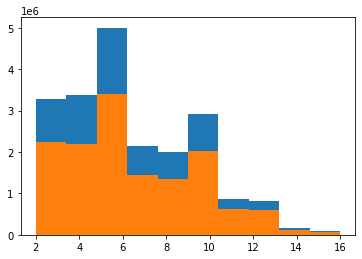

In [92]:
nsr_surp = np.concatenate(ns_read_surp)
nss_surp = np.concatenate(ns_skipped_surp)

print(len(ns_skipped_surp))
print(len(ns_read_surp))

print(nsr_surp.mean())
print(nss_surp.mean())

plt.hist(nsr_surp)
plt.hist(nss_surp)


10
10
6.375040799040284
6.458624541776945


(array([1615240., 1567456., 2437803., 1035058.,  954253., 1459006.,
         462115.,  450166.,   93457.,   57793.]),
 array([ 2. ,  3.4,  4.8,  6.2,  7.6,  9. , 10.4, 11.8, 13.2, 14.6, 16. ]),
 <a list of 10 Patch objects>)

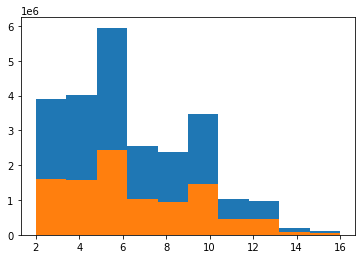

In [90]:
sr_surp = np.concatenate(s_read_surp)
ss_surp = np.concatenate(s_skipped_surp)

print(len(s_skipped_surp))
print(len(s_read_surp))

print(sr_surp.mean())
print(ss_surp.mean())

plt.hist(sr_surp)
plt.hist(ss_surp)
